In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('./Dataset/Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Check Data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
# Check 5 Number Summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Drop Insignificant Variable
df.drop('Serial No.', inplace=True, axis=1)

In [9]:
# Check for missing/null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:

df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x > 0.5 else 0)
y = df['Chance of Admit ']

In [11]:
y = pd.DataFrame(y)
y.head()

,Chance of Admit
0,1
1,1
2,1
3,1
4,1


In [12]:
X = df.drop(['Chance of Admit '],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [14]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)


StandardScaler()

In [15]:
scaled_inputs = scaler.transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [17]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth=3, random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [18]:
y_pred = DT_model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)


In [20]:
# Decision Tree Metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.97      0.98      0.97       141

    accuracy                           0.95       150
   macro avg       0.77      0.71      0.74       150
weighted avg       0.94      0.95      0.94       150



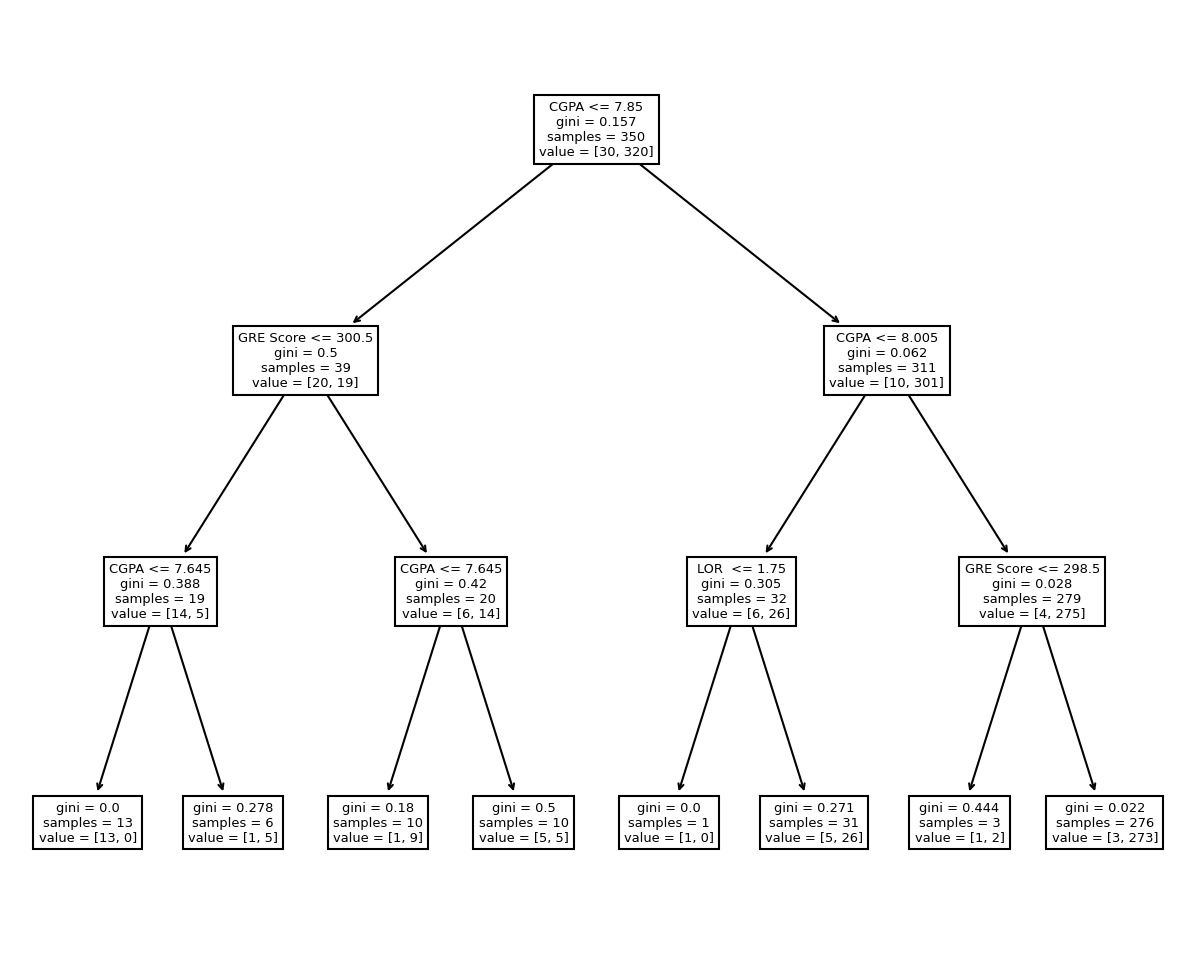

In [24]:
# Printing Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(DT_model, feature_names=X.columns);

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

/Users/anurag_singh/Desktop/DSBA/dsba-jupyter-notebook/pyenv/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
# Random Forest Metrics
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.96      0.99      0.97       141

    accuracy                           0.95       150
   macro avg       0.78      0.66      0.70       150
weighted avg       0.94      0.95      0.94       150

